# Part 1 – Data Loading and pre-processing


**a) Load the data into a pandas DataFrame**

In [3]:
# Importing pandas

import pandas as pd


In [4]:
# Loading the diamonds dataset

diamonds_dataset = pd.read_csv("../data/diamonds.csv")


**b) Clean the dataset by removing datapoints with missing values and datapoints that are repeated**

In [5]:
# Dropping missing values and duplicates

diamonds_dataset.dropna()
diamonds_dataset.drop_duplicates()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**c) For each feature in the dataset, make a figure containing 2 subplots showing:**

- The histogram of the values of the feature (all classes combined).
- The histogram of the values of the feature separately for each class, when using the "cut" column as the class identifier. Use a different color for each class.

In [6]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Creating a method to plot histograms


def plot_histograms(column: str):
    fig, axs = plt.subplots(nrows=2, figsize=(10, 8))
    data = diamonds_dataset
    sns.histplot(data, x=column, stat="density", bins=50, ax=axs[0])
    sns.histplot(data, x=column, stat="density", bins=50, ax=axs[1], hue="cut")


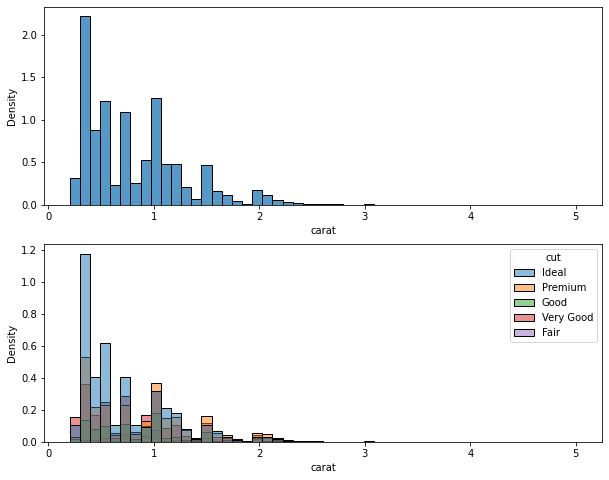

In [8]:
# Plotting the histograms for "carat"

plot_histograms("carat")


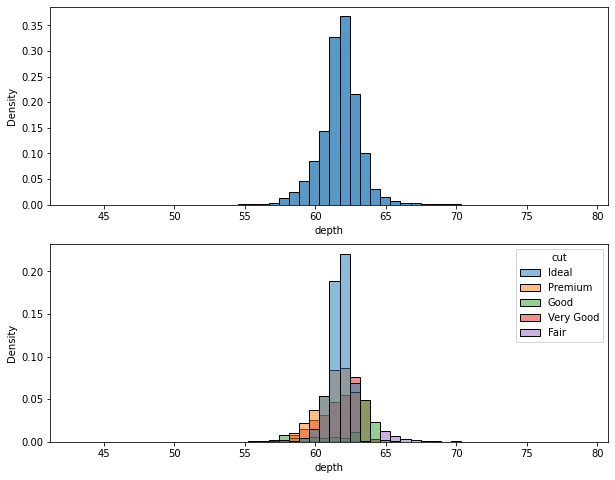

In [9]:
# Plotting the histograms for "depth"

plot_histograms("depth")


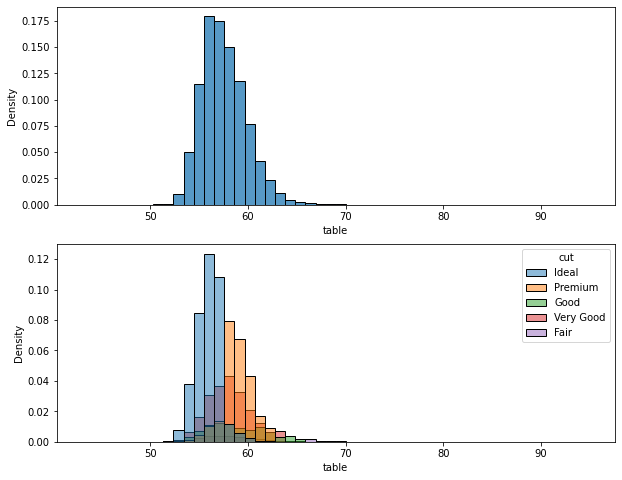

In [10]:
# Plotting the histograms for "table"

plot_histograms("table")


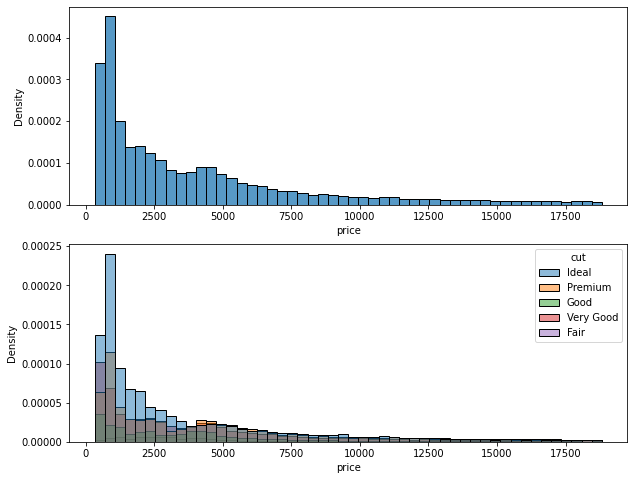

In [11]:
# Plotting the histograms for "price"

plot_histograms("price")


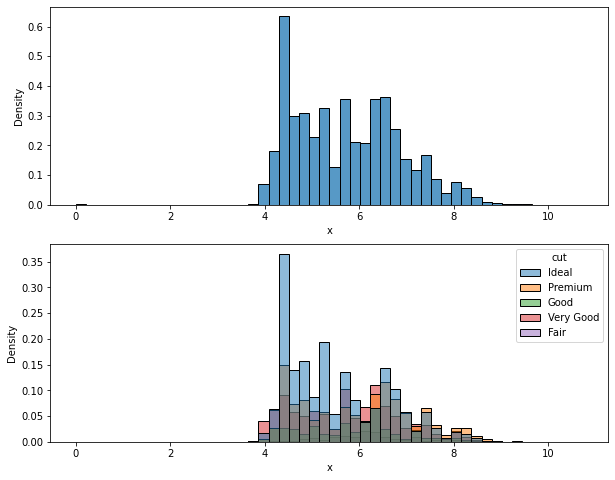

In [12]:
# Plotting the histograms for "x"

plot_histograms("x")


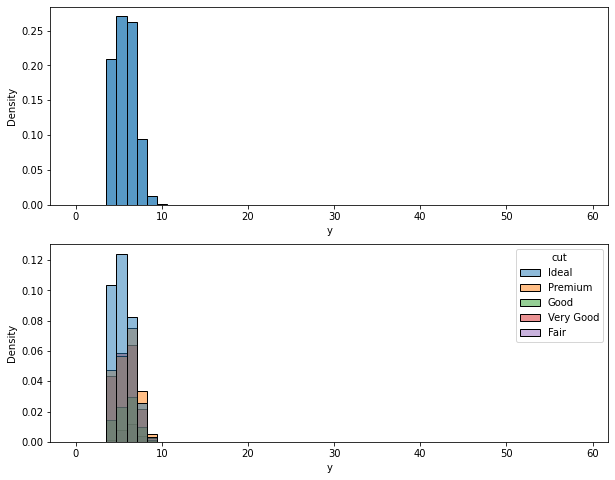

In [13]:
# Plotting the histograms for "y"

plot_histograms("y")


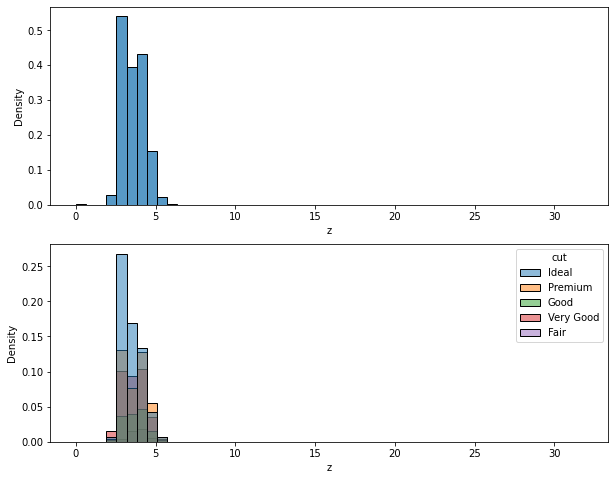

In [14]:
# Plotting the histograms for "z"

plot_histograms("z")


**d) Make a figure containing a matrix of subplots. These will present projections of the dataset
onto each pair of features, histogram of their distributions and values of Pearson correlation
coefficients.**

The matrix of subplots will be organized like Figure 2.

- The upper triangular section of the matrix will contain in the ($i$, $j$) entry the Pearson
  correlation between feature $i$ and feature $j$.
- The main diagonal will contain in position ($i$, $i$) the histograms of the values of feature $i$.
  These histograms are the same as you already plotted in point c): you should use a
  different colour for each class and histograms should have 50 bins and should be
  normalized (the area under the histogram should sum up to 1).
- The lower triangular section of the matrix will contain in the ($i$, $j$) entry the projections
  of the points onto the $i$ and $j$ features. Use a different colour for each class and the
  colours should match those used in the histograms.

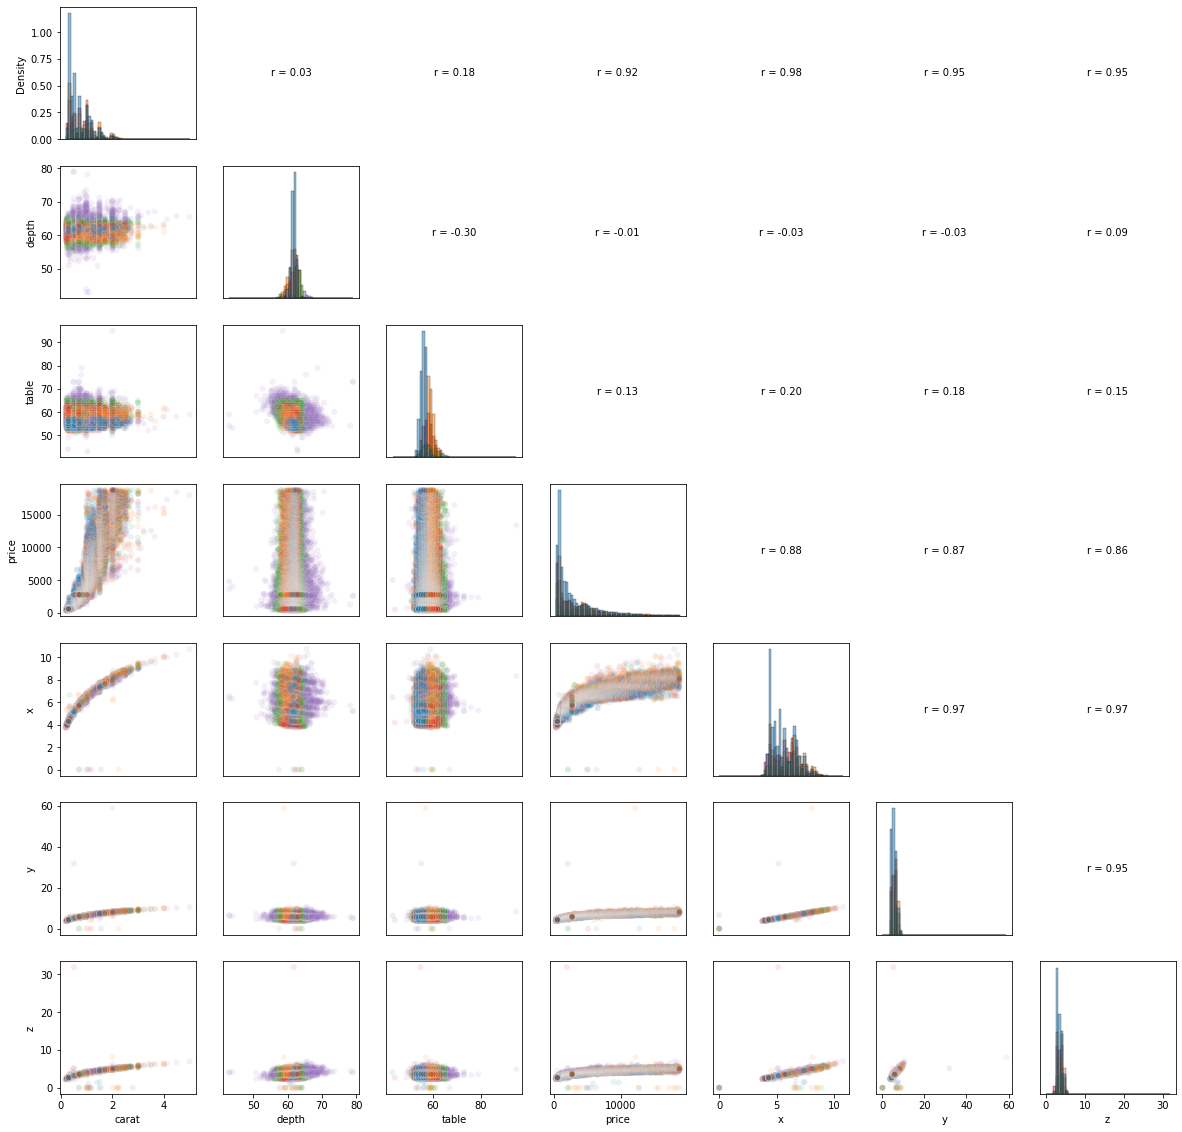

In [15]:
# Making the figure

from itertools import product
from numpy import corrcoef

columns = ["carat", "depth", "table", "price", "x", "y", "z"]
n = len(columns)

fix, axs = plt.subplots(nrows=n, ncols=n, figsize=(20, 20))

for i, j in product(range(n), range(n)):
    data = diamonds_dataset
    x = columns[j]
    y = columns[i]
    ax = axs[i, j]

    if i > j:
        sns.scatterplot(data=data, x=x, y=y, ax=ax, alpha=0.1, hue="cut")

    if i == j:
        plot = sns.histplot(data=data, x=x, stat="density", bins=50, ax=ax, hue="cut")

    if i < j:
        corr = corrcoef(data[x], data[y])[0, 1]
        ax.set_axis_off()
        ax.text(0.5, 0.5, f"r = {corr:.2f}", ha="center", va="center")

    if i != n - 1:
        ax.axes.get_xaxis().set_visible(False)
        ax.set_xticklabels([])

    if j != 0:
        ax.axes.get_yaxis().set_visible(False)
        ax.set_yticklabels([])

    ax.legend([], [], frameon=False)
